In [1]:
import numpy as np
from numpy.polynomial import Polynomial
from scipy import constants

import matplotlib.pyplot as plt

HOW I CONVERTED THE INTEGRAL TO HAVE BOUNDS FROM 0 TO 1

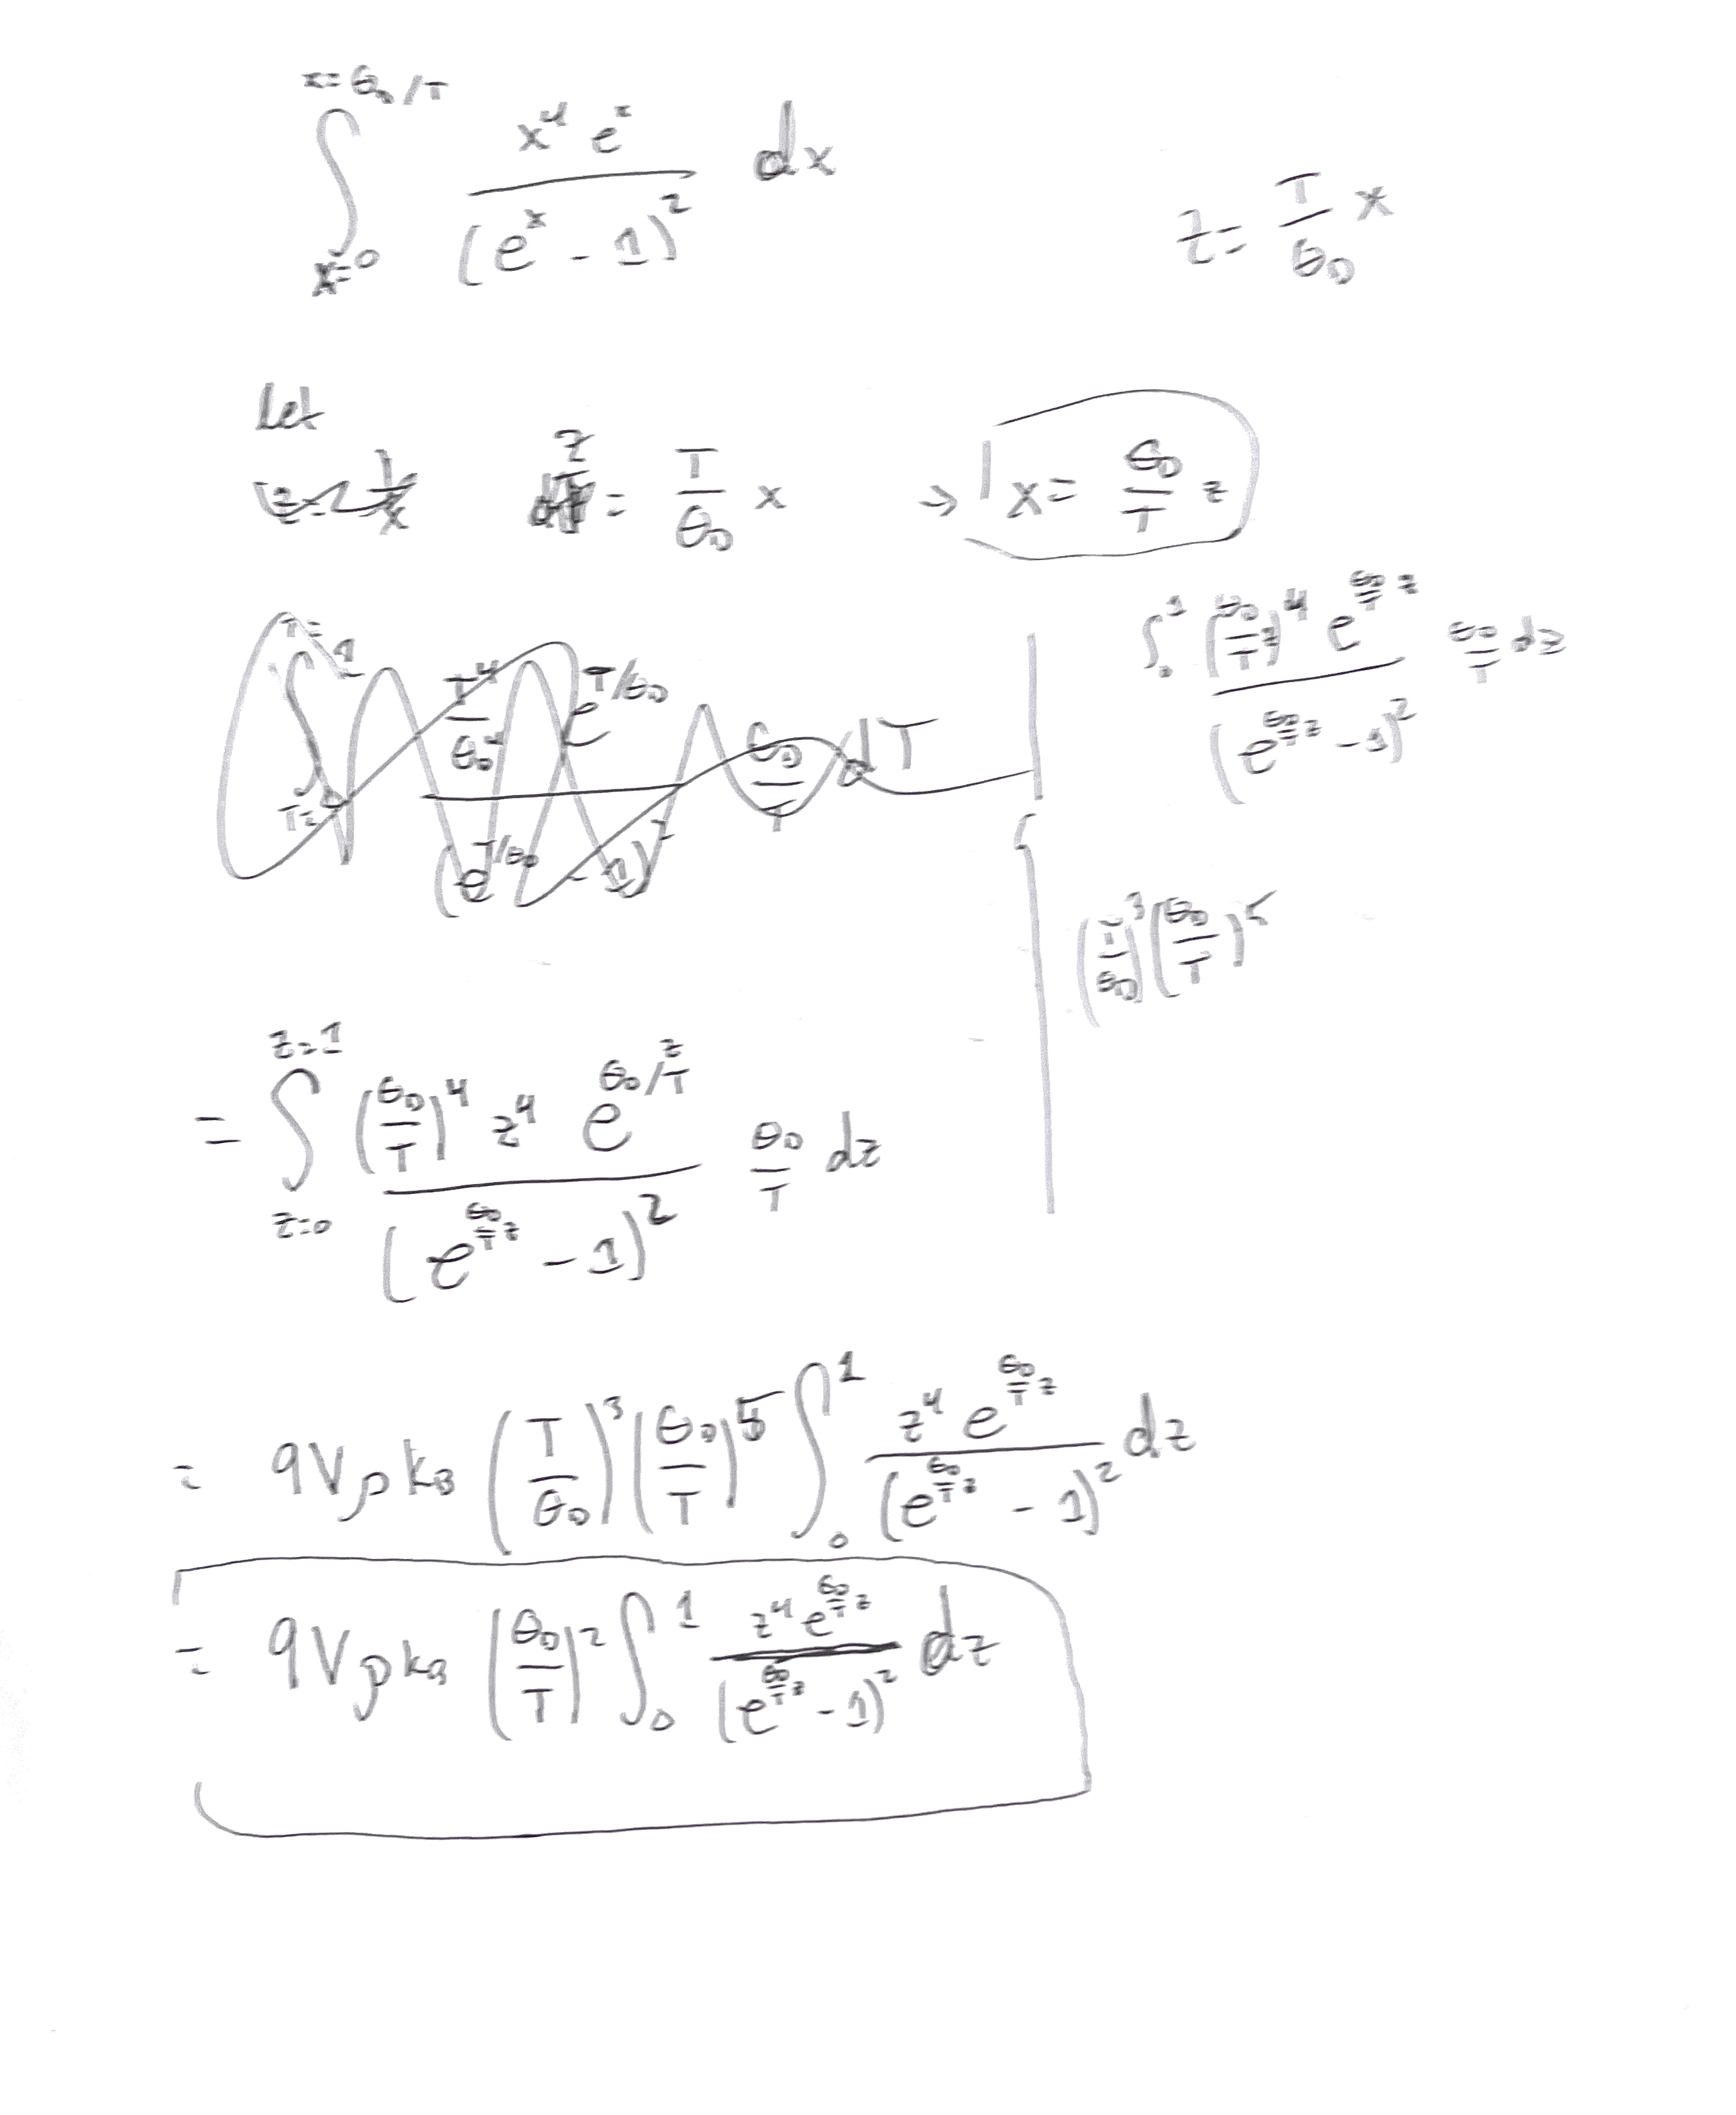

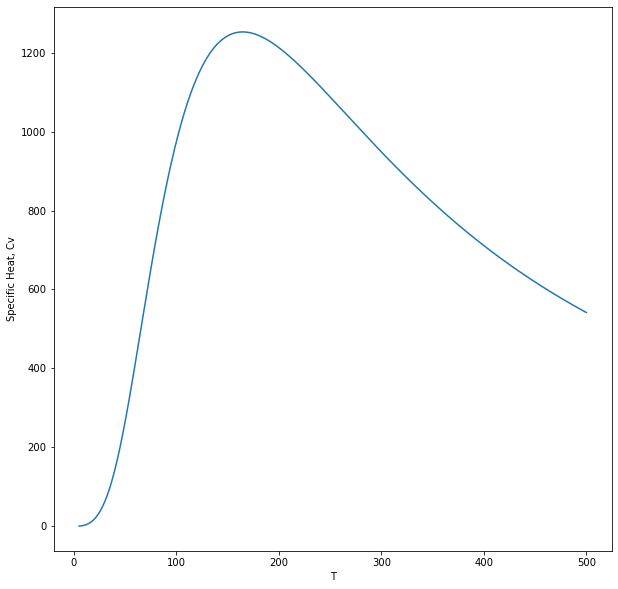

In [12]:
#PART A AND PART B

def gen_legendre(n):
    inner = Polynomial([-1,0,1])
    coef = ((2**n) * np.math.factorial(n)) 
    poly = inner**n
    return (coef**-1) * poly.deriv(n) #rodriguez formula


def func(x,T): #change function here
    p = 6.022*10**(28) #m^-3
    tD = 428 #K
    k = constants.k
    V = 0.001 #m^3
    f = 9*V*p*k*(tD/T)**2 * (x**4)*np.exp(tD/T * x) / (np.exp(tD/T * x))**2
    return  f
    
def cv(T):
    n=40
    P_n = gen_legendre(n) #generate legendre polynomial
    P_roots = P_n.roots() #roots of legendre polynomial
    dxdP = P_n.deriv()  #derivative of legendre polynomial
    weights = 2 / (1 - P_roots**2) * (1/dxdP(P_roots))**2 #calc weights
    
    new_weights = weights/2 #for new range 0 to 1 not -1 to 1
    new_roots = 0.5 * P_roots + 0.5
    return np.sum(new_weights*func(new_roots,T)) #integral on the new range


T = np.linspace(5,500,1000)
cv_s = np.zeros_like(T)
for i in range(len(T)):
    cv_s[i] = cv(T[i])
    
    
plt.figure(figsize=(10,10))
plt.plot(T,cv_s)
plt.xlabel('T')
plt.ylabel('Specific Heat, Cv')
plt.show()